In [13]:
import numpy as np
import PIL.Image as image
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from skimage import color

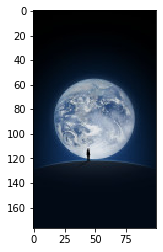

In [14]:
filePath=r'../data/weixin.jpg'
f = open(filePath,'rb')
img = image.open(f)
plt.imshow(img)
plt.show()

data = []
width, height = img.size
for x in range(width):
    for y in range(height):
        # 得到点(x,y)的三个通道值
        c1, c2, c3 = img.getpixel((x, y))
        data.append([c1, c2, c3])
f.close()

# 采用Min-Max规范化
mm = preprocessing.MinMaxScaler()
img = np.mat(mm.fit_transform(data))

In [15]:
# 用K-Means对图像进行2聚类
kmeans =KMeans(n_clusters=2)
kmeans.fit(img)
label = kmeans.predict(img)
label = label.reshape([width, height])

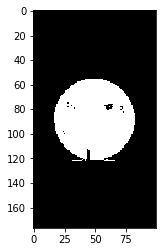

In [16]:
# 创建个新图像pic_mark，用来保存图像聚类的结果，并设置不同的灰度值
pic_mark = image.new("L", (width, height))
for x in range(width):
    for y in range(height):
        # 根据类别设置图像灰度, 类别0 灰度值为255， 类别1 灰度值为127
        pic_mark.putpixel((x, y), int(256/(label[x][y]+1))-1)
plt.gray()
plt.imshow(pic_mark)
plt.show()
#存储图片
pic_mark.save("weixin_mark.jpg", "JPEG")

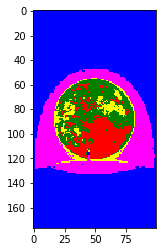

In [20]:
# 用K-Means对图像进行16聚类
kmeans =KMeans(n_clusters=5)
kmeans.fit(img)
label = kmeans.predict(img)
# 将图像聚类结果，转化成图像尺寸的矩阵
label = label.reshape([width, height])
# 将聚类标识矩阵转化为不同颜色的矩阵
label_color = (color.label2rgb(label)*255).astype(np.uint8)
label_color = label_color.transpose(1,0,2)
images = image.fromarray(label_color)
plt.gray()
plt.imshow(images)
plt.show()
# #保存结果
# images.save('weixin_mark_color.jpg')